In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import graphviz
import pydotplus
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
# For reproducible results
RANDOM_STATE_SEED = 420

In [ ]:
df_dataset = pd.read_csv("/content/drive/MyDrive/dataaaa/processed_dataset.csv")

In [ ]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,37953,5,3,135,127,135,0,27.0,60.373835,127,...,0.0,0,0,0.0,0.0,0,0,0,0,1
1,117573474,3,0,1500,0,500,500,500.0,0.000000,0,...,0.0,0,0,58800000.0,23800000.0,75600000,42000000,0,1,0
2,99743998,5,0,2500,0,500,500,500.0,0.000000,0,...,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,0,1,0
3,99743999,5,0,2500,0,500,500,500.0,0.000000,0,...,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,0,1,0
4,89479580,6,0,3000,0,500,500,500.0,0.000000,0,...,0.0,4000308,4000308,21400000.0,15300000.0,42000000,7200316,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397499,24391,2,0,0,0,0,0,0.0,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
397500,1189,5,2,935,261,935,0,187.0,418.144712,261,...,0.0,0,0,0.0,0.0,0,0,0,0,1
397501,1357,5,2,935,310,935,0,187.0,418.144712,310,...,0.0,0,0,0.0,0.0,0,0,0,0,1
397502,1260,5,2,935,298,935,0,187.0,418.144712,298,...,0.0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397504 entries, 0 to 397503
Data columns (total 73 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      397504 non-null  int64  
 1   Tot Fwd Pkts       397504 non-null  int64  
 2   Tot Bwd Pkts       397504 non-null  int64  
 3   TotLen Fwd Pkts    397504 non-null  int64  
 4   TotLen Bwd Pkts    397504 non-null  int64  
 5   Fwd Pkt Len Max    397504 non-null  int64  
 6   Fwd Pkt Len Min    397504 non-null  int64  
 7   Fwd Pkt Len Mean   397504 non-null  float64
 8   Fwd Pkt Len Std    397504 non-null  float64
 9   Bwd Pkt Len Max    397504 non-null  int64  
 10  Bwd Pkt Len Min    397504 non-null  int64  
 11  Bwd Pkt Len Mean   397504 non-null  float64
 12  Bwd Pkt Len Std    397504 non-null  float64
 13  Flow IAT Mean      397504 non-null  float64
 14  Flow IAT Std       397504 non-null  float64
 15  Flow IAT Max       397504 non-null  int64  
 16  Fl

In [ ]:
train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [ ]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
231828,2208,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
156998,6434,3,4,273,935,273,0,91.000000,157.616624,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
37404,30237,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
272071,3117,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
193017,29336,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178094,2014,3,4,266,935,266,0,88.666667,153.575172,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
62239,15433,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
152127,15188,3,4,299,935,299,0,99.666667,172.627731,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
119174,16001,3,4,314,935,314,0,104.666667,181.287984,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1


In [ ]:
test

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
210071,6998,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
15797,37660,3,4,266,935,266,0,88.666667,153.575172,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
170777,28218,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
238322,9536,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1
362408,1311,5,2,935,299,935,0,187.000000,418.144712,299,...,0.0,0,0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70906,15456,3,4,316,935,316,0,105.333333,182.442685,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
13048,11135,3,4,311,935,311,0,103.666667,179.555934,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
244328,10162,3,4,323,935,323,0,107.666667,186.484137,935,...,0.0,0,0,0.0,0.0,0,0,1,0,1
332136,6848,2,0,0,0,0,0,0.000000,0.000000,0,...,0.0,0,0,0.0,0.0,0,0,1,0,1


In [ ]:
numerical_cols = df_dataset.columns[:-3]
numerical_cols

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [ ]:
min_max_scaler = MinMaxScaler().fit(train[numerical_cols])

In [ ]:
train[numerical_cols] = min_max_scaler.transform(train[numerical_cols])

In [ ]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
231828,0.000018,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
156998,0.000054,0.000006,0.032258,0.000028,0.102511,0.258523,0.0,0.093238,0.228385,0.84692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
37404,0.000252,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
272071,0.000026,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
193017,0.000244,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178094,0.000017,0.000006,0.032258,0.000027,0.102511,0.251894,0.0,0.090847,0.222529,0.84692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
62239,0.000129,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
152127,0.000127,0.000006,0.032258,0.000030,0.102511,0.283144,0.0,0.102117,0.250136,0.84692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
119174,0.000133,0.000006,0.032258,0.000032,0.102511,0.297348,0.0,0.107240,0.262684,0.84692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


In [ ]:
test[numerical_cols] = min_max_scaler.transform(test[numerical_cols])

In [ ]:
test

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
210071,0.000058,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
15797,0.000314,0.000006,0.032258,0.000027,0.102511,0.251894,0.0,0.090847,0.222529,0.846920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
170777,0.000235,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
238322,0.000079,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
362408,0.000011,0.000013,0.016129,0.000094,0.032781,0.885417,0.0,0.191598,0.605887,0.270833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70906,0.000129,0.000006,0.032258,0.000032,0.102511,0.299242,0.0,0.107923,0.264357,0.846920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
13048,0.000093,0.000006,0.032258,0.000031,0.102511,0.294508,0.0,0.106216,0.260175,0.846920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
244328,0.000085,0.000006,0.032258,0.000033,0.102511,0.305871,0.0,0.110314,0.270214,0.846920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
332136,0.000057,0.000003,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1


In [ ]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 37525
Malicious: 359979
---------------
Training set:

Benign: 26263
Malicious: 251989
---------------
Test set:

Benign: 11262
Malicious: 107990


In [ ]:
y_train = np.array(train.pop("Label")) # pop removes "Label" from the dataframe
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(278252, 72)
(278252,)


In [ ]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(119252, 72)
(119252,)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99999)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(30)])
test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(30)])

In [ ]:
train_pca_df.shape

(278252, 30)

In [ ]:
test_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.330066,-0.014249,-0.037862,-0.000215,0.000477,-0.000674,-0.000123,-0.000074,0.000051,-0.000017,...,-7.588751e-06,0.000024,-1.430534e-05,-0.000046,-0.000014,-0.000134,0.000039,-0.000044,0.000015,9.623685e-07
1,-1.342800,-0.267948,-0.001093,-0.004699,-0.022563,0.002631,0.003614,-0.027638,0.007538,0.005841,...,-1.734188e-04,0.000014,-1.063882e-04,0.000282,0.000150,0.001055,-0.000290,0.000463,-0.000205,-2.799917e-04
2,1.330069,-0.014247,-0.037674,-0.000045,0.000466,-0.000769,0.000287,-0.000054,0.000041,-0.000032,...,2.818114e-05,0.000159,7.450096e-05,0.000026,0.000030,-0.000286,0.000094,-0.000205,0.000008,2.410291e-05
3,1.330067,-0.014249,-0.037840,-0.000194,0.000477,-0.000690,-0.000074,-0.000072,0.000050,-0.000016,...,-3.298715e-06,0.000054,-6.872816e-07,-0.000045,-0.000010,-0.000195,0.000059,-0.000086,0.000016,4.708535e-06
4,-1.195171,1.207474,-0.019976,-0.002336,-0.002588,-0.000676,0.000216,-0.000761,0.000679,0.001923,...,-2.268136e-04,-0.000552,6.218899e-05,0.000064,-0.000011,0.000071,-0.000056,-0.000203,-0.000116,1.615028e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119247,-1.357908,-0.234228,-0.001928,0.002665,0.012217,-0.002062,-0.001877,0.014150,-0.004127,-0.003475,...,1.332300e-04,0.000115,1.988284e-05,-0.000051,-0.000051,0.000755,-0.000419,0.000657,-0.000156,2.058812e-05
119248,-1.356378,-0.237602,-0.001849,0.001946,0.008735,-0.001553,-0.001330,0.009955,-0.002971,-0.002573,...,3.272795e-05,0.000060,2.898019e-05,-0.000078,-0.000051,0.000613,-0.000365,0.000526,-0.000191,2.196072e-05
119249,-1.360058,-0.229503,-0.002037,0.003722,0.017086,-0.002714,-0.002628,0.020017,-0.005728,-0.004781,...,1.802597e-04,0.000164,2.440782e-06,-0.000120,-0.000076,0.000562,-0.000338,0.000599,-0.000065,7.833174e-05
119250,1.330066,-0.014249,-0.037864,-0.000216,0.000477,-0.000673,-0.000126,-0.000074,0.000051,-0.000017,...,-7.842713e-06,0.000022,-1.521519e-05,-0.000046,-0.000014,-0.000129,0.000037,-0.000040,0.000014,7.066782e-07


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(random_state=RANDOM_STATE_SEED),n_features_to_select=30)
X_train_rfe = rfe.fit_transform(X_train_pca, y_train)
X_test_rfe = rfe.transform(X_test_pca)

In [ ]:
model = LogisticRegression(max_iter=1000) 
# hyperparameters = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'solver': ['liblinear', 'saga']
# }

In [ ]:
model.fit(X=X_train_rfe, y=y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model

LogisticRegression(max_iter=1000)

In [ ]:
predictions = model.predict(X_test_rfe)

In [ ]:
train_predictions = model.predict(X_train_rfe)

In [ ]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
test_accuracy = accuracy_score(y_test, predictions)

In [ ]:
test_accuracy

0.9998826015496596

In [ ]:
train_accuracy = accuracy_score(y_train, train_predictions)


In [ ]:
train_accuracy

0.9999029656570303

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 11248     14]
 [     0 107990]]


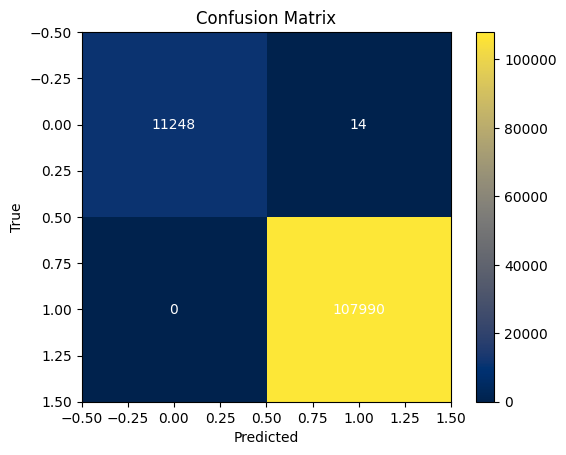

In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming you have already trained a model and have X_test and y_test for testing
# Replace `model` with your trained model and `X_test` and `y_test` with your test data

# Generate predictions
y_pred = model.predict(X_test_rfe)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='cividis')

# Add value annotations to the heatmap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.99876   0.99938     11262
           1    0.99987   1.00000   0.99994    107990

    accuracy                        0.99988    119252
   macro avg    0.99994   0.99938   0.99966    119252
weighted avg    0.99988   0.99988   0.99988    119252



AUC score on test data: 1.000
AUC score on train data: 1.000


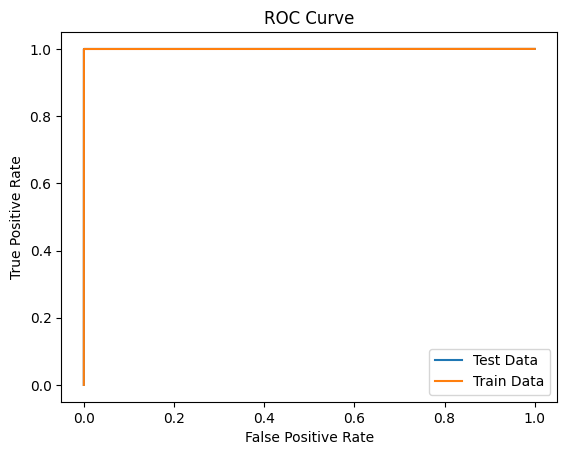

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtain predicted probabilities on test data
y_pred_proba = model.predict_proba(X_test_rfe)[:, 1]

# Obtain predicted probabilities on train data
train_pred_proba = model.predict_proba(X_train_rfe)[:, 1]

# Calculate TPR and FPR for different probability thresholds on test data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate TPR and FPR for different probability thresholds on train data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pred_proba)

# Plot ROC curve for test data
plt.plot(fpr, tpr, label='Test Data')

# Plot ROC curve for train data
plt.plot(train_fpr, train_tpr, label='Train Data')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate AUC score on test data
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC score on test data: {auc_score:.3f}')

# Calculate AUC score on train data
train_auc_score = roc_auc_score(y_train, train_pred_proba)
print(f'AUC score on train data: {train_auc_score:.3f}')
